In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder


In [2]:
df = pd.read_csv(r"D:\3rd year\Activities\Technocolabs softwares\project 1\9961_14084_bundle_archive\Train.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
Test_df = pd.read_csv(r"D:\3rd year\Activities\Technocolabs softwares\project 1\9961_14084_bundle_archive\Test.csv")
Test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
Test_df.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [7]:
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())
Test_df['Item_Weight']=Test_df['Item_Weight'].fillna(Test_df['Item_Weight'].mean())


In [8]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [9]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

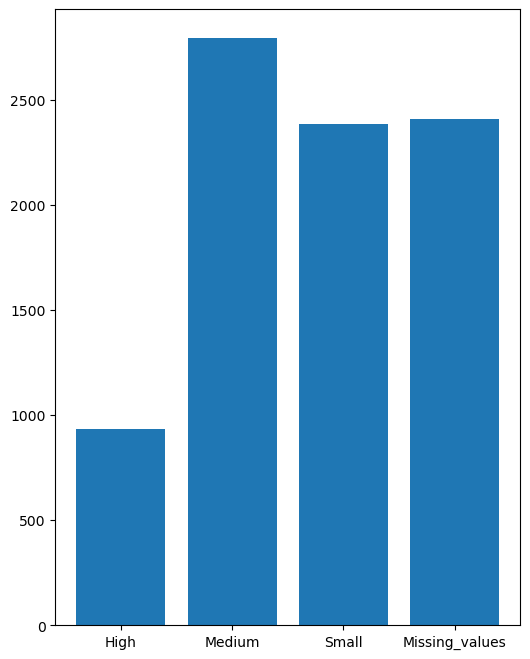

In [10]:
Outlet_Size={"High":932,
             'Medium':2793,
             'Small':2388,
             'Missing_values':2410}
plt.ax =plt.subplots(figsize=(6,8))
names = list(Outlet_Size.keys())
values = list(Outlet_Size.values())

plt.bar(range(len(Outlet_Size)), values, tick_label=names)
plt.show()
# fig=plt.figure()
# ax = fig.add_subplot(1,1,1)
# ax.hist(df['Outlet_Size'])
# plt.show()

In [11]:
df['Outlet_Size']=df['Outlet_Size'].fillna('Medium')
Test_df['Outlet_Size']=Test_df['Outlet_Size'].fillna('Medium')

In [12]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [13]:
Test_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [14]:
df.duplicated().any()

False

In [15]:
Test_df.duplicated().any()

False

In [16]:
df.loc[:,'Item_Visibility'].replace(to_replace=0,value=df['Item_Visibility'].mean(),inplace=True)

In [17]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [18]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'})
Test_df['Item_Fat_Content']=Test_df['Item_Fat_Content'].replace({'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'})


df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

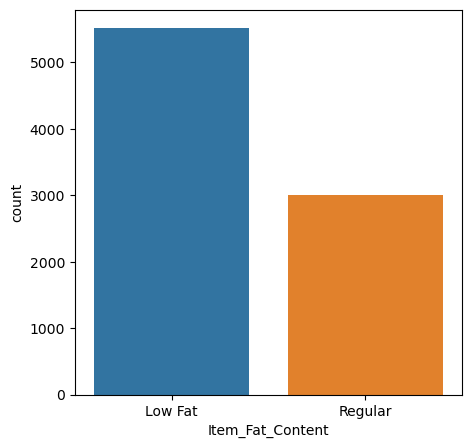

In [19]:
plt.figure(figsize=(5,5))
sns.countplot(x='Item_Fat_Content', data=df)
plt.show()

In [20]:
Item_Fat_Content_separation=pd.get_dummies(df.Item_Fat_Content,prefix='Item_Fat_Content').astype(int)
Test_Item_Fat_Content_separation=pd.get_dummies(Test_df.Item_Fat_Content,prefix='Item_Fat_Content').astype(int)

In [21]:
df = pd.concat([df,Item_Fat_Content_separation],axis=1)
Test_df = pd.concat([Test_df,Test_Item_Fat_Content_separation],axis=1)
df.drop('Item_Fat_Content', axis=1, inplace=True)
Test_df.drop('Item_Fat_Content', axis=1, inplace=True)

df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,1,0
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0,1
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,1,0
3,FDX07,19.20,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,0,1
4,NCD19,8.93,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,1,0


In [22]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

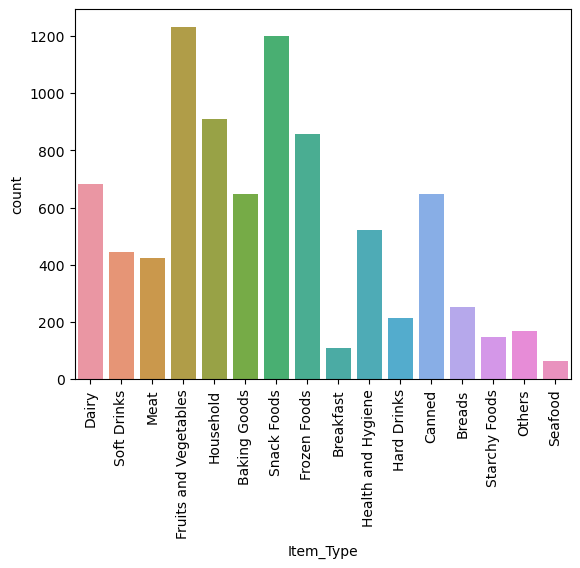

In [23]:
labels = list(df['Item_Type'].unique())
chart = sns.countplot(x=df['Item_Type'])
chart.set_xticklabels(labels=labels, rotation=90);

In [24]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

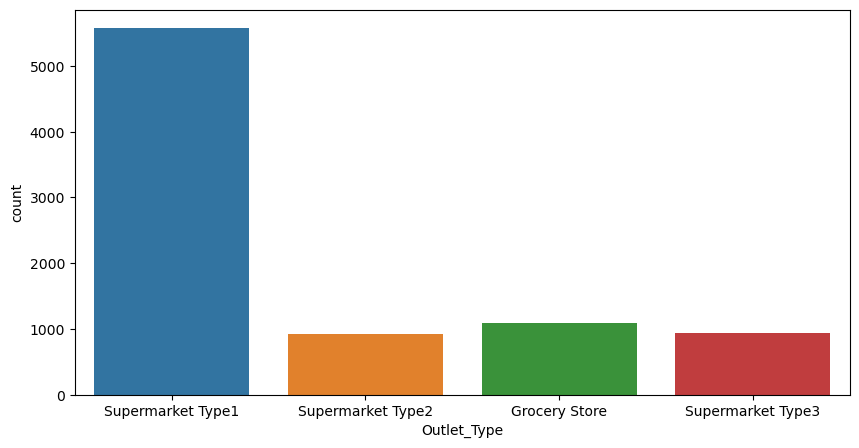

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(x='Outlet_Type', data=df)
plt.show()

In [26]:
Outlet_Type_separation=pd.get_dummies(df.Outlet_Type,prefix='Outlet_Type').astype(int)
df = pd.concat([df,Outlet_Type_separation],axis=1)
df.drop('Outlet_Type', axis=1, inplace=True)

Test_Outlet_Type_separation=pd.get_dummies(Test_df.Outlet_Type,prefix='Outlet_Type').astype(int)
Test_df = pd.concat([Test_df,Test_Outlet_Type_separation],axis=1)
Test_df.drop('Outlet_Type', axis=1, inplace=True)


In [27]:
Outlet_Size_separation=pd.get_dummies(df.Outlet_Size,prefix='Outlet_Size').astype(int)
df = pd.concat([df,Outlet_Size_separation],axis=1)
df.drop('Outlet_Size', axis=1, inplace=True)

Test_Outlet_Size_separation=pd.get_dummies(Test_df.Outlet_Size,prefix='Outlet_Size').astype(int)
Test_df = pd.concat([Test_df,Test_Outlet_Size_separation],axis=1)
Test_df.drop('Outlet_Size', axis=1, inplace=True)

In [28]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

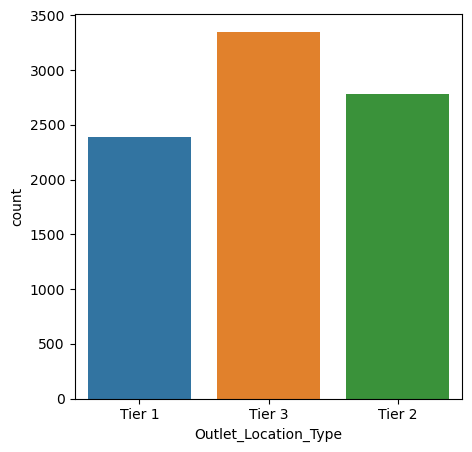

In [29]:
plt.figure(figsize=(5,5))
sns.countplot(x='Outlet_Location_Type', data=df)
plt.show()

In [30]:
Outlet_Location_Type_separation=pd.get_dummies(df.Outlet_Location_Type,prefix='Outlet_Location_Type').astype(int)
df = pd.concat([df,Outlet_Location_Type_separation],axis=1)
df.drop('Outlet_Location_Type', axis=1, inplace=True)


Test_Outlet_Location_Type_separation=pd.get_dummies(Test_df.Outlet_Location_Type,prefix='Outlet_Location_Type').astype(int)
Test_df = pd.concat([Test_df,Test_Outlet_Location_Type_separation],axis=1)
Test_df.drop('Outlet_Location_Type', axis=1, inplace=True)

df.head()



,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,1,0,0,1,0,0,0,1,0,1,0,0
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,0,1,0,0,1,0,0,1,0,0,0,1
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,1,0,0,1,0,0,0,1,0,1,0,0
3,FDX07,19.20,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,0,1,1,0,0,0,0,1,0,0,0,1
4,NCD19,8.93,0.066132,Household,53.8614,OUT013,1987,994.7052,1,0,0,1,0,0,1,0,0,0,0,1


In [31]:
encoder = LabelEncoder()

df['Item_Type'] = encoder.fit_transform( df['Item_Type'])
Test_df['Item_Type']= encoder.fit_transform(Test_df['Item_Type'])

In [32]:
df.drop('Item_Identifier', axis=1, inplace=True)
df.drop('Outlet_Identifier', axis=1, inplace=True)
Test_df.drop('Item_Identifier', axis=1, inplace=True)
Test_df.drop('Outlet_Identifier', axis=1, inplace=True)

In [33]:
# correlation with the target column
correlation_matrix = df.corr()
correlation_matrix['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales                1.000000
Item_MRP                         0.567574
Outlet_Type_Supermarket Type3    0.311192
Outlet_Type_Supermarket Type1    0.108765
Outlet_Size_Medium               0.075154
Outlet_Location_Type_Tier 2      0.058261
Outlet_Location_Type_Tier 3      0.046376
Outlet_Size_High                 0.024170
Item_Fat_Content_Regular         0.018719
Item_Type                        0.017048
Item_Weight                      0.011550
Item_Fat_Content_Low Fat        -0.018719
Outlet_Type_Supermarket Type2   -0.038059
Outlet_Establishment_Year       -0.049135
Outlet_Size_Small               -0.098403
Outlet_Location_Type_Tier 1     -0.111287
Item_Visibility                 -0.134138
Outlet_Type_Grocery Store       -0.411727
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:>

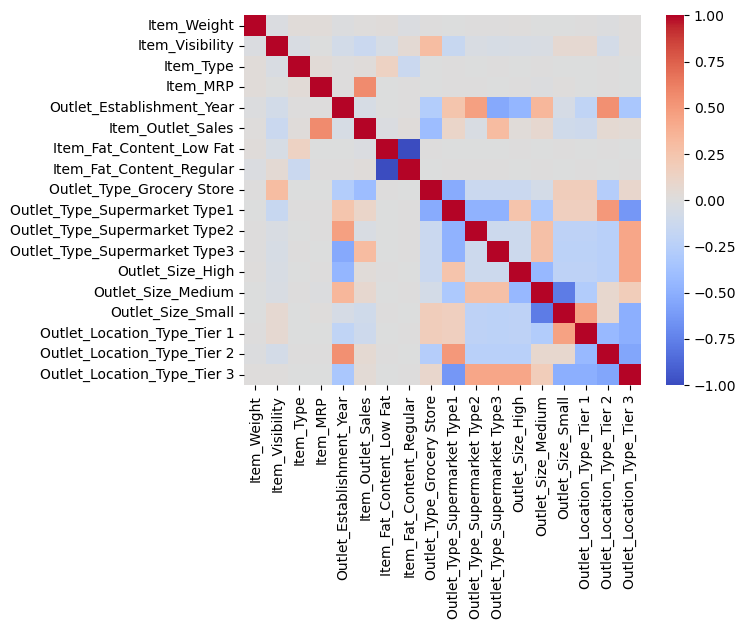

In [34]:
sns.heatmap(correlation_matrix, cmap='coolwarm')

In [35]:
X = df.drop('Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [36]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train,y_train)
acc=linear_regression_model.score(X_test,y_test)
print('Linear Regression Accuracy: ', acc)

Linear Regression Accuracy:  0.5634088068449874


In [41]:
preds = linear_regression_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
model_score = r2_score(y_test,preds)


print('RMSE: ', rmse)
print('R2 Score: ', model_score)


RMSE:  1153.0204227366728
R2 Score:  0.5634088068449874


In [43]:
ridge_model = Ridge()
ridge_model.fit(X_train,y_train)

preds = ridge_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
model_score = r2_score(y_test,preds)
acc=ridge_model.score(X_test,y_test)

print('RMSE: ', rmse)
print('R2 Score: ', model_score)
print('Accuracy: ', acc)

RMSE:  1153.2453860342332
R2 Score:  0.5632384255160658
Accuracy:  0.5632384255160658


In [44]:
lasso_model = Lasso()
lasso_model.fit(X_train,y_train)
preds = lasso_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
model_score = r2_score(y_test,preds)
acc=lasso_model.score(X_test,y_test)

print('RMSE: ', rmse)
print('R2 Score: ', model_score)
print('Accuracy: ', acc)

RMSE:  1154.673472817593
R2 Score:  0.5621560546167965
Accuracy:  0.5621560546167965


In [47]:
dtr_model = DecisionTreeRegressor()
dtr_model.fit(X_train,y_train)
preds = dtr_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
model_score = r2_score(y_test,preds)
acc=dtr_model.score(X_test,y_test)

print('RMSE: ', rmse)
print('R2 Score: ', model_score)
print('Accuracy: ', acc)

RMSE:  1582.9120358030004
R2 Score:  0.177161632187815
Accuracy:  0.177161632187815


In [50]:
rfr_model = RandomForestRegressor()
rfr_model.fit(X_train,y_train)
preds = rfr_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
model_score = r2_score(y_test,preds)
acc=rfr_model.score(X_test,y_test)

print('RMSE: ', rmse)
print('R2 Score: ', model_score)
print('Accuracy: ', acc)

RMSE:  1160.4470457513758
R2 Score:  0.5577665123836864
Accuracy:  0.5577665123836864
